In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd /Share/home/chenxupeng/projects/economics/

/Share/home/chenxupeng/projects/economics


In [3]:
countrys = np.array(['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'CHN', 'CYP', 'CZE',
       'DEU', 'DNK', 'ESP','EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IDN',
       'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX',
       'MLT', 'NLD', 'POL', 'PRT', 'ROM', 'RUS', 'SVK', 'SVN', 'SWE',
       'TUR', 'TWN', 'USA', 'RoW'])
indexnames = ['L3_1_DVA_FIN','L3_4_RDV','L3_6_FVA_INT','L3_2_DVA_INT',
              'L3_5_FVA_FIN','L3_7_DDC','L3_3_DVA_INTrex','L3_5_MVA','L3_8_FDC']
years = np.arange(1995,2012).astype('str')

In [4]:
data = pd.read_csv('out/1995/1995_L3_1_DVA_FINchnto.csv')
data.head()

,Unnamed: 0,AUS,AUS.1,AUS.2,AUS.3,AUS.4,AUS.5,AUS.6,AUS.7,AUS.8,...,RoW.25,RoW.26,RoW.27,RoW.28,RoW.29,RoW.30,RoW.31,RoW.32,RoW.33,RoW.34
0,1,9.634497,0.082433,43.294954,108.613572,14.447230,4.141640,1.839912,0.055277,2.156700,...,3.950931,0.065732,0.016070,-0.000039,-0.001323,-0.002318,0.031079,-0.000888,-0.000635,0.0
1,2,0.156035,1.653956,1.920331,15.804386,1.492543,0.790885,0.567507,0.699370,1.999027,...,2.646659,0.080156,0.011658,-0.000054,-0.000615,-0.001705,0.032668,-0.000824,-0.000459,0.0
2,3,0.271771,0.011853,37.771600,6.909645,4.048341,0.232769,0.167095,0.010919,0.407334,...,1.289894,0.014310,0.004235,-0.000009,-0.000263,-0.000629,0.009279,-0.000221,-0.000242,0.0
3,4,0.037836,0.017835,0.515837,309.679280,4.065809,0.367767,0.356281,0.014116,0.344077,...,0.539934,0.028842,0.003384,-0.000009,-0.000179,-0.000623,0.005781,-0.000210,-0.000200,0.0
4,5,0.006439,0.003365,0.085322,3.411260,26.199182,0.106021,0.041068,0.002798,0.043712,...,0.092039,0.003749,0.000666,-0.000002,-0.000030,-0.000096,0.001018,-0.000032,-0.000021,0.0


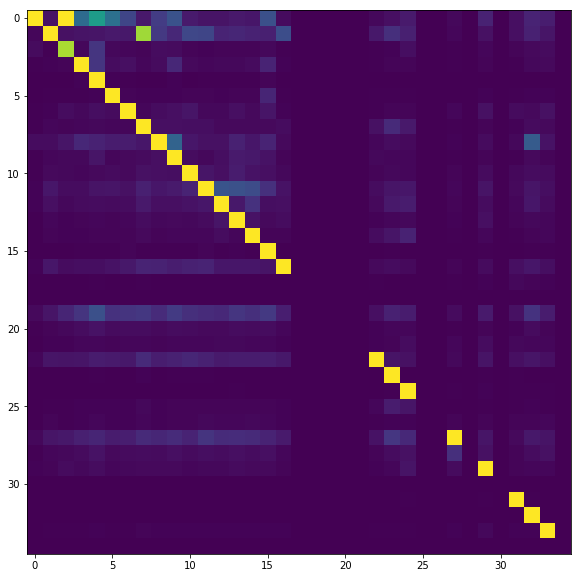

In [5]:
scaler = MinMaxScaler()
transformed = scaler.fit_transform(np.array(data.iloc[:,35*39+1:35*40+1]))
fig,ax=plt.subplots(1,figsize=(10,10))
ax.imshow(transformed)

In [20]:
def get_scaled_data(indexname,year,country,option):
    '''
    index 
    year 
    country you want like USA
    option :tochn or chnto
    '''
    if option == 'tochn':
        data = pd.read_csv('out/'+year+'/'+year+'_'+indexname+'_tochn.csv')
        ind =np.where(country==countrys)[0][0]
        transformed = scaler.fit_transform(np.array(data.iloc[:,35*ind+1:35*(ind+1)+1]))
    elif option =='chnto':
        data = pd.read_csv('out/'+year+'/'+year+'_'+indexname+'_chnto.csv')
        ind =np.where(country==countrys)[0][0]
        transformed = scaler.fit_transform(np.array(data.iloc[:,35*ind+1:35*(ind+1)+1]))
    else:
        print 'no such option'
    return transformed, 'year: '+year+', indicator: '+indexname  +', country: '+country+' '+option

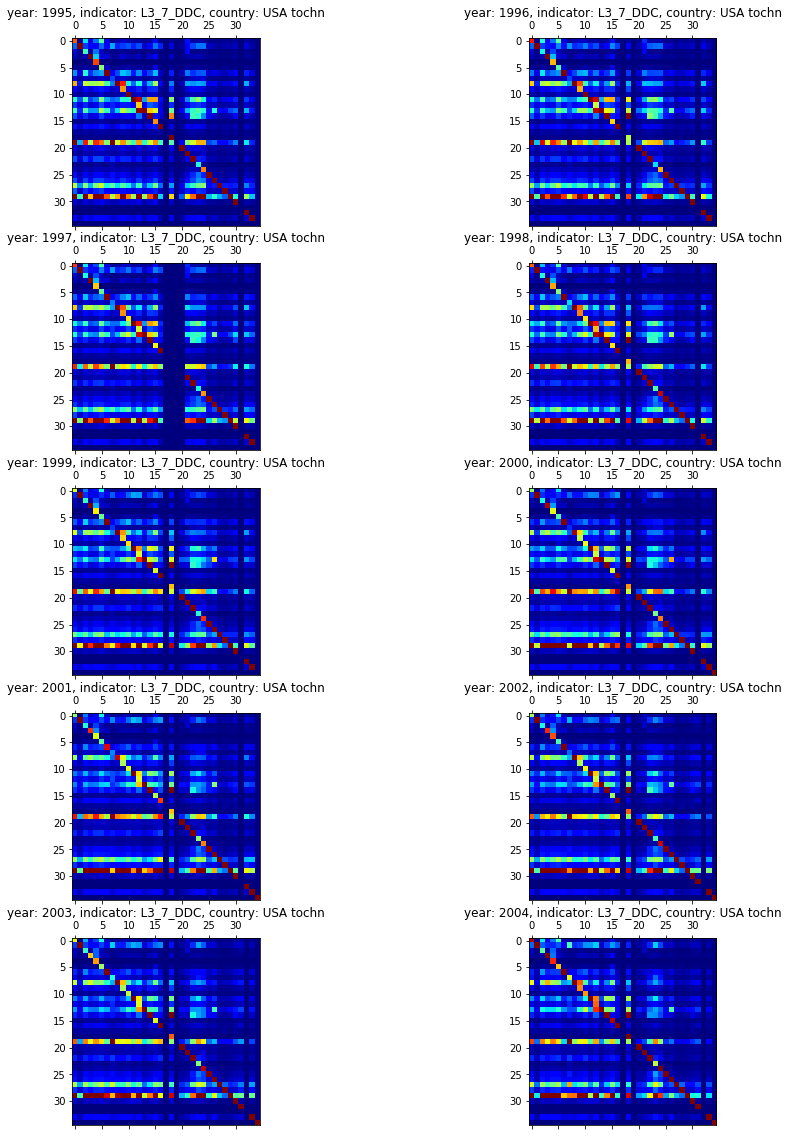

In [22]:
fig,ax=plt.subplots(5,2,figsize=(15,20))
for i in range(5):
    for j in range(2):
        data = get_scaled_data(indexnames[5],years[i*2+j],'USA','tochn')[0]
        title = get_scaled_data(indexnames[5],years[i*2+j],'USA','tochn')[1]
        ax[i,j].matshow(data,cmap='jet')
        ax[i,j].set_title(title,y=1.08)

In [48]:
def animations(maps,count,indexname,country,opt):
    '''
    data = volumes_raw
    'gist_earth'
    '''
    data={}
    for i in range(count):
        data[i] = get_scaled_data(indexname,years[i],country,opt)[0]
    imagelist = [data[i] for i in range(count)]
    fig = plt.figure(figsize=(10,10)) # make figure

    # make axesimage object
    # the vmin and vmax here are very important to get the color map correct

    im =plt.imshow(imagelist[0], cmap=maps)
    if opt=='tochn':
        countrypair = country+' to CHN'
    else:
        countrypair = 'CHN to '+country
    plt.title( countrypair+':  '+indexname.split('_')[2]+' change in '+ str(count)+ ' years')

    def updatefig(j):
        # set the data in the axesimage object
        im.set_array(imagelist[j])
        # return the artists set
        return [im]
    # kick off the animation
    anim = animation.FuncAnimation(fig, updatefig, frames=range(count), 
                                  interval=500, blit=True)
    Writer = animation.writers['imagemagick']
    writer1 = Writer(fps=2)
    anim.save('animation.gif', writer=writer1)
    #return anim
    return anim

KeyError: 'imagemagick'

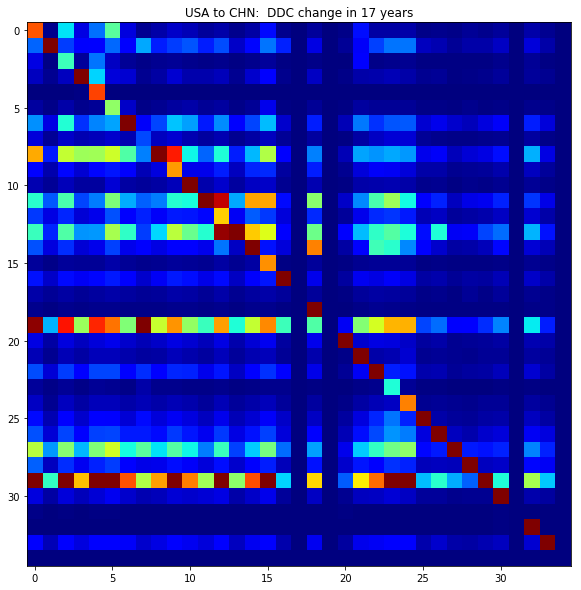

In [49]:
animations('jet',17,indexnames[5],'USA','tochn')